# Fashion-MNIST Using OpenAI's ChatGPT
Fifth in this series. Trying to add a Confusion Matrix using only the OpenAI ChatGPT.

In [1]:
# Import TensorFlow and other libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the class names for the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Split the training data into training and validation sets
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

# Normalize the pixel values
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [2]:
# Import the layers you need
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add
from tensorflow.keras.models import Model

# Define the input tensor
inputs = Input(shape=(28, 28, 1))

# Define the first convolutional layer
x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)

# Define the first pooling layer
x = MaxPooling2D((2, 2), padding='same')(x)

# Define the second convolutional layer
y = Conv2D(64, (3, 3), padding='same', activation='relu')(x)

# Define the second pooling layer
y = MaxPooling2D((1, 1), padding='same')(y)

# Add the output of the first convolutional layer to the output of the second convolutional layer
z = Add()([x, y])

# Define the third convolutional layer
z = Conv2D(128, (3, 3), activation='relu')(z)

# Define the fourth convolutional layer
z = Conv2D(128, (3, 3), activation='relu')(z)

# Define the fifth convolutional layer with more kernels
z = Conv2D(256, (3, 3), activation='relu')(z)

# Define the third pooling layer
z = MaxPooling2D((2, 2))(z)

# Flatten the output of the third pooling layer
z = Flatten()(z)

# Define the dense layer
z = Dense(512, activation='relu')(z)

# Define the output layer
outputs = Dense(10, activation='softmax')(z)

# Define the model
model = Model(inputs, outputs)


2022-12-11 02:58:10.659157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 02:58:10.668512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 02:58:10.668976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 02:58:10.670352: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model
history = model.fit(x_train, y_train, verbose=2, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


2022-12-11 02:58:13.891242: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-12-11 02:58:15.360645: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1719/1719 - 12s - loss: 0.5153 - accuracy: 0.8155 - val_loss: 0.3634 - val_accuracy: 0.8726 - 12s/epoch - 7ms/step
Epoch 2/20
1719/1719 - 9s - loss: 0.3268 - accuracy: 0.8820 - val_loss: 0.3397 - val_accuracy: 0.8724 - 9s/epoch - 5ms/step
Epoch 3/20
1719/1719 - 9s - loss: 0.2747 - accuracy: 0.9001 - val_loss: 0.2820 - val_accuracy: 0.8986 - 9s/epoch - 5ms/step
Epoch 4/20
1719/1719 - 9s - loss: 0.2397 - accuracy: 0.9117 - val_loss: 0.2716 - val_accuracy: 0.9014 - 9s/epoch - 5ms/step
Epoch 5/20
1719/1719 - 9s - loss: 0.2131 - accuracy: 0.9215 - val_loss: 0.2709 - val_accuracy: 0.9047 - 9s/epoch - 5ms/step
Epoch 6/20
1719/1719 - 9s - loss: 0.1897 - accuracy: 0.9297 - val_loss: 0.2533 - val_accuracy: 0.9082 - 9s/epoch - 5ms/step
Epoch 7/20
1719/1719 - 9s - loss: 0.1688 - accuracy: 0.9378 - val_loss: 0.2534 - val_accuracy: 0.9119 - 9s/epoch - 5ms/step
Epoch 8/20
1719/1719 - 9s - loss: 0.1491 - accuracy: 0.9452 - val_loss: 0.2421 - val_accuracy: 0.9191 - 9s/epoch - 5ms/step
Epoch 9/20
1719/1

In [5]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 0.40723752975463867
Test accuracy: 0.9192000031471252


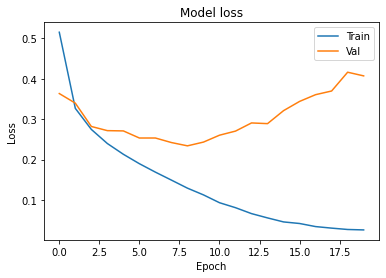

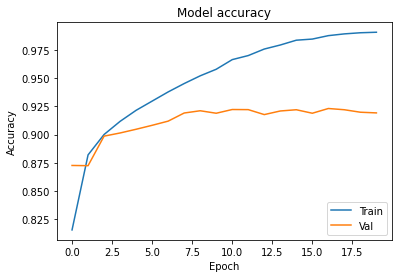

In [6]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


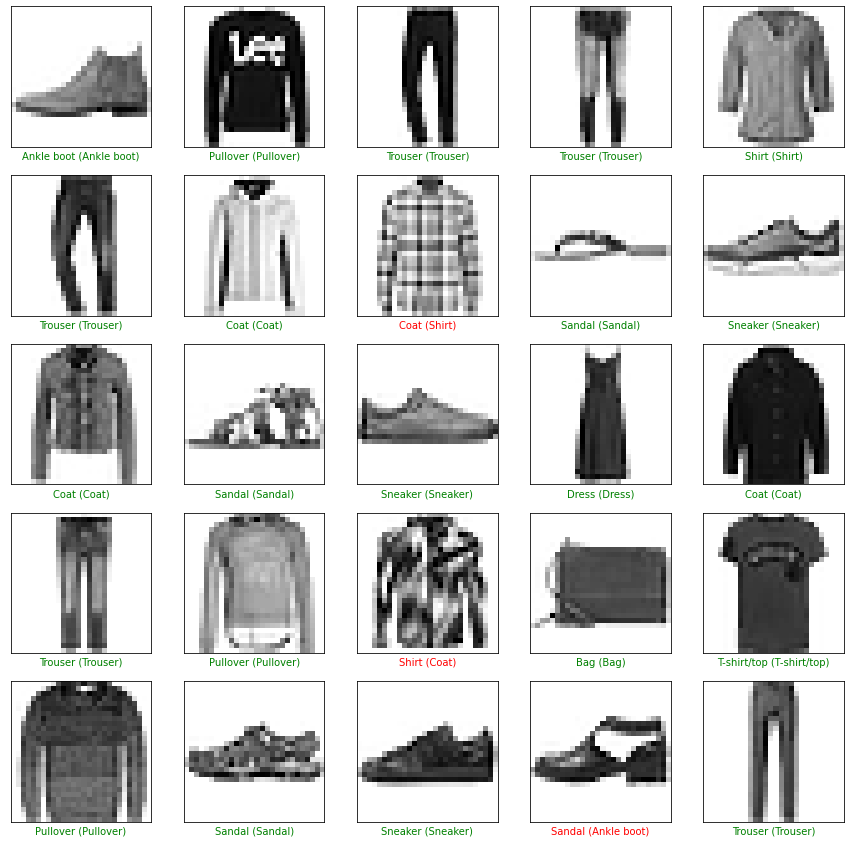

In [7]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Plot the first 25 test images with their predicted labels
plt.figure(figsize=(15,15))  # Set the figure size to 15 inches by 15 inches
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),
                                  color=color)
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Convert the true labels and predictions to class labels
true_labels = y_test
pred_labels = predictions.argmax(axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true=true_labels, y_pred=pred_labels)


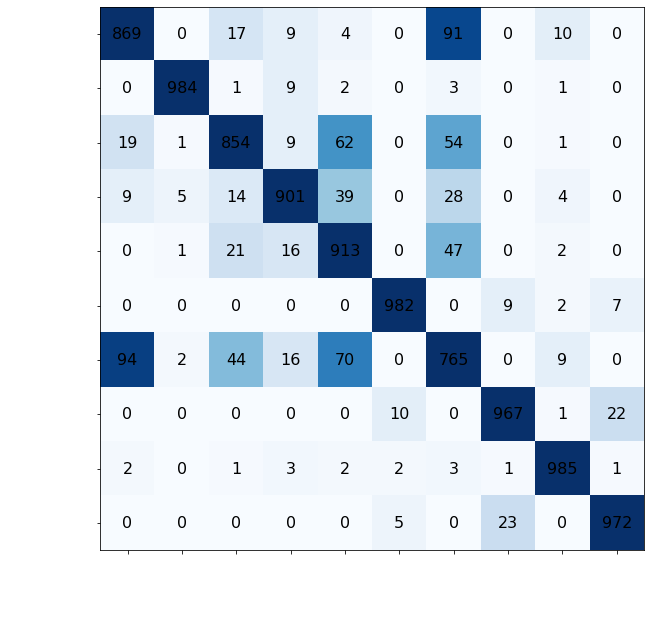

In [19]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Create the heatmap with custom color scaling
im = ax.imshow(conf_matrix, cmap='Blues', vmin=0, vmax=100)

# Add labels to the plot
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names, fontdict={'color': 'white', 'size': 16})
ax.set_yticklabels(class_names, fontdict={'color': 'white', 'size': 16})

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Loop over the data dimensions and create text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=16)

# Show the plot
plt.show()


(Deep Voice) Previously on OpenAI's ChatGPT Coding Challenge:
- 01 - 87%
- 02 - 90%
- 03 - 91%
- 04 - 92%
- 05 - Confusion Matrix <---- You are here

It got hung up a bit with argmax and axis=1 issues.

But, the end result is pretty good. Some impressive moments.